**Support vector machine** là một mô hình học máy mạnh mẽ và linh hoạt, có khả năng linear hoặc non-linear classification, regression, thậm chí là phát hiện mới. SVM hoạt động rất tốt với các tập dữ liệu vừa và nhỏ (vài trăm đến vài nghìn instances), đặc biệt với các task phân loại. Tuy nhiên, nó không scale tốt với các tập dữ liệu rất lớn

In [34]:
import matplotlib.pyplot as plt

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [35]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "svm"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Linear SVM Classification

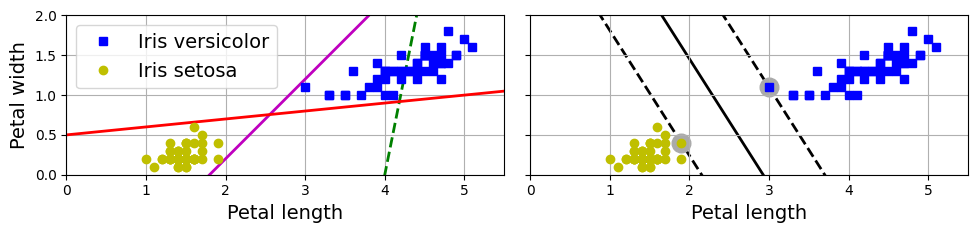

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values # type: ignore
y = iris.target # type: ignore

setosa_or_vesicolor = (y == 0) | (y == 1)
X = X[setosa_or_vesicolor]
y = y[setosa_or_vesicolor]

# SVM Classifier model
svm_clf = SVC(kernel="linear", C=1e100)
svm_clf.fit(X, y)

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5


def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    svs = svm_clf.support_vectors_

    plt.plot(x0, decision_boundary, "k-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, "k--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, "k--", linewidth=2, zorder=-2)
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA', zorder=-1)

fig, axes = plt.subplots(ncols=2, figsize=(10, 2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="upper left")
plt.axis([0, 5.5, 0, 2]) # type: ignore
plt.gca().set_aspect("equal")
plt.grid()

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length")
plt.axis([0, 5.5, 0, 2]) # type: ignore
plt.gca().set_aspect("equal")
plt.grid()

save_fig("large_margin_classification_plot")
plt.show()

Theo hình train ta thấy những điểm dữ liệu là *linear separable*. Hình bên trái thể hiện decision boundaries của 3 classifiers. Mô hình có decision boundary được biểu diễn bằng đường đứt nét tệ đến mức nó thậm chí không phân tách các lớp một cách chính xác. Hai model còn lại làm việc tốt với training set nhưng decision boundary của chúng quá gần với các instance nên model có thể sẽ không hoạt động tốt với các instances mới.

Ngược lại, đường nét liền trong biểu đồ bên phải biểu diễn decision boundary của classifier SVM; đường này không chỉ phân tách hai lớp mà còn giữ khoảng cách xa nhất có thể với các trường hợp đào tạo gần nhất. Có thể nghĩ SVM classifier nằm  trong khoảng giữa 2 đường nét đứt (gọi là *large margin classification*)

Thêm các instances ngoài khoảng tạo bời 2 đường đứt (off the street) sẽ không ảnh hưởng tới decision boudaries, các ranh giới này được xác định (hoặc "support") với các instances nằm trên cạnh của nó gọi là **support vector** (được khoanh tròn ở trên)

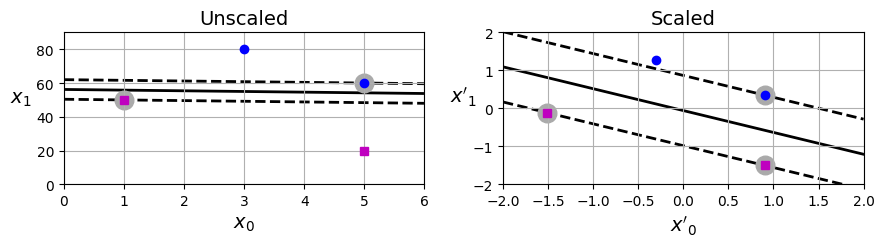

In [37]:
# extra code – this cell generates and saves Figure 5–2

from sklearn.preprocessing import StandardScaler

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel="linear", C=100).fit(Xs, ys)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf_scaled = SVC(kernel="linear", C=100).fit(X_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$")
plt.ylabel("$x_1$    ", rotation=0)
plt.title("Unscaled")
plt.axis([0, 6, 0, 90]) # type: ignore
plt.grid()

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf_scaled, -2, 2)
plt.xlabel("$x'_0$")
plt.ylabel("$x'_1$  ", rotation=0)
plt.title("Scaled")
plt.axis([-2, 2, -2, 2]) # type: ignore
plt.grid()

save_fig("sensitivity_to_feature_scales_plot")
plt.show()

**Lưu ý: SVM rất nhạy cảm với `feature scale` ở bên ảnh trái trục dọc lớn hơn nhiều so với trục ngang, độ rộng street (khoảng cách giữa 2 đường đứt) sẽ nhỏ hơn và gần với đường ngang, sau khi thực hiện biến đổi ta được biểu đồ bên phải trông có vẻ đẹp hơn**

## Soft Margin Classification

Nếu chúng ta muốn áp đặt một perfect classification, nó được gọi là **hard margin classification**. Có 2 vấn đề chính

- Nó chỉ khả thi nếu dữ liệu **linearly separable**
- Rất nhạy cảm với nhiễu

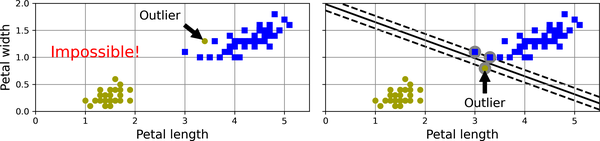

Cần phải sử dụng các mô hình linh hoạt hơn. Mục tiêu là tìm ra sự cần bằng giữa việc giữ cho street lớn nhất có thể (các vạch đứt gần với từng cụm nhất có thể) và hạn chế các **margin violation**. Nó được gọi là **soft margin classification**

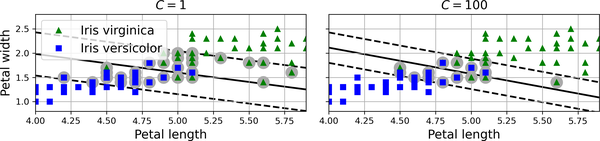

Khi sử dụng SVM trong scikit-learn cần hiệu chỉnh một vài hyperparameter. ví dụ trên hình C nhỏ có thể làm street lớn nhưng có nhiều margin violations hơn, mặt khác giảm C dẫn đến nhiều instances support street hơn làm giảm overfitting, nhưng nếu nhiều quá có thể dẫn đến underfitting như ví dụ ở trên

In [38]:
# trains a linear SVM classifier to detect Iris virginica flowers

from sklearn import svm
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values # type: ignore
y = (iris.target == 2) # type: ignore

svm_clf = make_pipeline(
    StandardScaler(),
    LinearSVC(C=1, random_state=42)
)
svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [39]:
X_new = [[5.5, 1.7], [5.0, 1.5]]
svm_clf.predict(X_new)


array([ True, False])

In [40]:
svm_clf.decision_function(X_new)

array([ 0.66163816, -0.22035761])

# Nonlinear SVM Classification

Một SVM classifiers hiệu quả và thường hoạt động rất tốt, nhiều tập dữ liệu thậm chí còn không gần với linearly separable. Một cách tiếp cận để xử lí các nonlinear datasets là thêm các feature. Ví dụ như các feature polynomial, trong một số trường hợp điều này có thể dẫn đến một dataset linearly separable

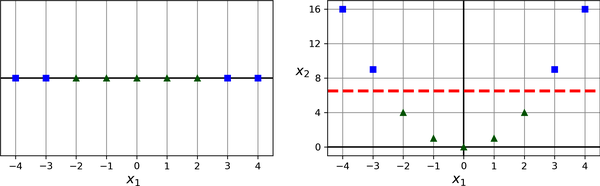

Ví dụ: hình bên trái chỉ có một feature $x_1$ và không linearly separable, thêm feature $x_2 = x_1^2$ là được hình bên trái và đã được 1 dataset linearly separable

In [41]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [42]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [43]:
polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, random_state=42, max_iter=10_000)
)

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('standardscaler', StandardScaler()),
                ('linearsvc',
                 LinearSVC(C=10, max_iter=10000, random_state=42))])

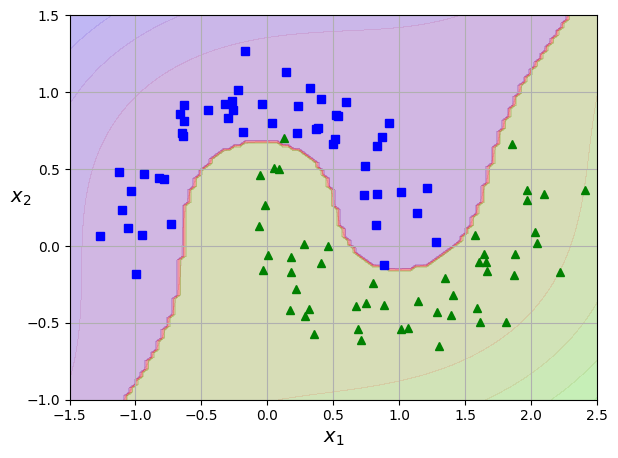

In [44]:
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

## Polynomial Kernel

Việc thêm các polynomial features có thể thực hiện một các đơn giản và hoạt động tốt với các thuật toán ML (không chỉ SVM). Tuy nhiên, nếu thêm vào ít sẽ không thể giải quyết được các datasets phức tạp, tuy nhiên nếu thêm nhiều thì sẽ tạo ra một số lượng lớn các features, có thể làm mô hình rất chậm.

Khi sử dụng SVM có thể áp dụng một kĩ thuật toán học để giải quyết vấn đề này gọi là `kernel trick`. Kernel trick giúp ta có thể có được kết quả tương tự khi thêm nhiều polynomial features, thậm chí với bậc rất cao mà không thực sự phải thêm chúng vào.

In [45]:
# test kernel trick with moon datasets

from sklearn.svm import SVC

poly_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
)
poly_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

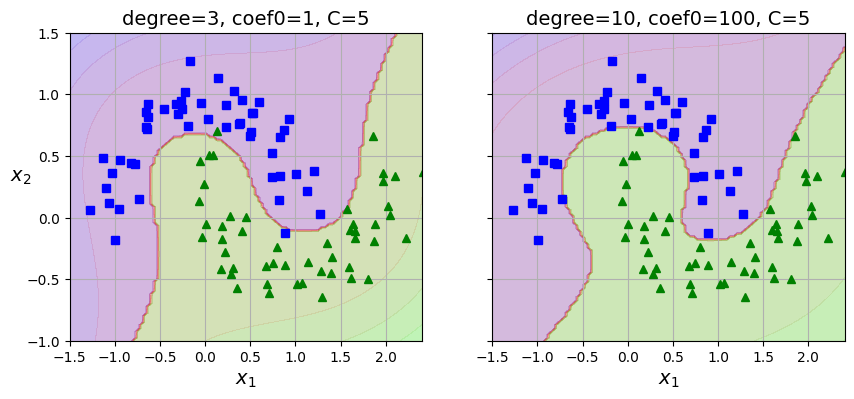

In [46]:
from numpy import poly


poly100_kernel_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=10, coef0=10, C=5)
)
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=3, coef0=1, C=5")

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title("degree=10, coef0=100, C=5")
plt.ylabel("")

plt.show()

Nếu mô hình bị overfittingm ta có thể thử giảm `degree` và ngược lại. Hyperparameter `coef0` kiếm soát mức độ mô hình bị ảnh hưởng bởi các feature bậc cao và thấp

## Similarity Features

Một kỹ thuật khác để giải quyết vấn đề nonlinear là thêm các features được tính toán bằng similarity function (hàm tương tự), đo mức độ giống nhau của trừng instance với một mốc cụ thể



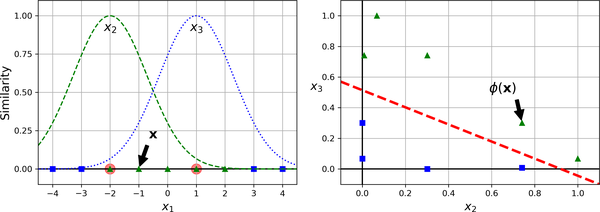

Ví dụ: từ bộ dữ liêu 1 chiều thêm 2 mốc $x_1=-2$ và $x_1=1$. Chúng ta sẽ định nghĩa `similarity function` là `RBF Gaussian` với $\gamma = 0.3$, tức là hàm hình chuông thay đổi từ 0 (rất xa điểm mốc) đến 1 (tại điểm mốc). Tại hình trên instance $x_1=-1$ nó cách mốc đầu tiên 1 và mốc thứ hai là 2. Do đó các feature mới là $x_2=\operatorname{exp}(-0.3 \times 1^2) \approx 0.74$ và $x_3=\operatorname{exp}(-0.3 \times 2^2) \approx 0.30$. Hình bên phải cho thấy tập dữ liệu đã được chuyển đổi (bỏ feature gốc tức là $x_1$), và nó đã linear separable

**Làm thế nào để chọn điểm mốc ?**

Cách tiếp cận đơn giản nhất là tạo điểm mốc tại từng instance trong dataset. Làm như vậy sẽ tạo ra nhiều chiều và do đó sẽ làm tăng khả năng training set sau khi biến đổi là linearly separable.

Nhược điểm là nếu training set là tập có `m` instance và `n` features thì sẽ được chuyển đổi thành `m` instance và `m` features (giả sử đã bỏ đi các feature gốc). Nếu dataset lớn, ta sẽ có một tập features lớn tương đương

## Gaussian RBF Kernel

Giống như `Polinomial feature`, `similarity features` cũng rất hữu ích với bất kỳ thuật toán ML nào, nhưng độ phức tạp lớn để tính toán tất cả các features được thêm vào (đặc biệt với các training set lớn). `Gaussian RBF kernel` cũng là một thủ thuật giúp chúng ta có kết quả như thêm các feature nhưng không thực sự làm như vậy

In [47]:
rbf_kernel_svm_clf = make_pipeline(StandardScaler(),
                                   SVC(kernel="rbf", gamma=5, C=0.001))
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

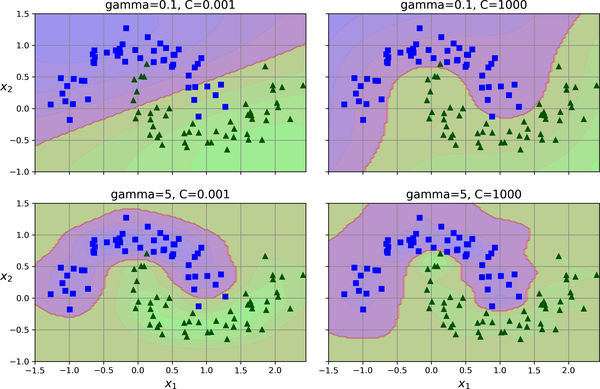

Tăng gamma làm cho đường cong hình chuông hẹp hơn. Do đó, phạm vi ảnh hưởng của mỗi instance nhỏ hơn: decision boundary cuối cùng trở nên bất thường hơn, dao động quanh các trường hợp riêng lẻ.

Ngược lại với gamma nhỏm các instance có phạm vi ảnh hưởng lớn hơn và decision boundary mượt mà hơn.

$\Rightarrow$ gamma hoạt động như một regularization hyperparameter, nếu mô hình overfitting thì giảm, underfitting thì tăng.

**Còn một vài các loại kernel khác nhưng ít khi được sử dụng**